In [2]:
####################################################
# 6 June 2025
# Alums of Duke History Dept
#
# Parse Studio
#
###################################################

%pip install pandas openpyxl
import pandas as pd
from datetime import date


Note: you may need to restart the kernel to use updated packages.


In [5]:
#Load data
df = pd.read_csv("grads.csv")
df.head()

,gradyr,Academic Plan,Plan Full Descr,job,role,employer,profession,industry,id
0,2023,U-HIST-AB,History (AB),LGBTQ+ Reporter at PolitiFact,LGBTQ+ Reporter,PolitiFact,Journalist,Media,1
1,2023,U-HIST-AB2,History (AB2),Legislative Correspondent at US House of Repre...,Legislative Correspondent,US House of Representatives,Legislative Staffer,Government,2
2,2023,U-HIST-AB,History (AB),NaN,NaN,NaN,NaN,NaN,3
3,2023,U-HIST-AB2,History (AB2),Music Agent Trainee at United Talent Agency,Music Agent Trainee,United Talent Agency,Talent Agent,Entertainment,4
4,2023,U-HIST-AB2,History (AB2),NaN,NaN,NaN,NaN,NaN,5


In [6]:
# Rename columns
df = df.rename(columns={
    "Completion Year (Academic)": "gradyr",
    "Where Are They Now": "job",
    "Role": "role",
    "Employer": "employer",
    "Profession": "profession",
    "Industry": "industry"})

df.head()

,gradyr,Academic Plan,Plan Full Descr,job,role,employer,profession,industry,id
0,2023,U-HIST-AB,History (AB),LGBTQ+ Reporter at PolitiFact,LGBTQ+ Reporter,PolitiFact,Journalist,Media,1
1,2023,U-HIST-AB2,History (AB2),Legislative Correspondent at US House of Repre...,Legislative Correspondent,US House of Representatives,Legislative Staffer,Government,2
2,2023,U-HIST-AB,History (AB),NaN,NaN,NaN,NaN,NaN,3
3,2023,U-HIST-AB2,History (AB2),Music Agent Trainee at United Talent Agency,Music Agent Trainee,United Talent Agency,Talent Agent,Entertainment,4
4,2023,U-HIST-AB2,History (AB2),NaN,NaN,NaN,NaN,NaN,5


In [7]:
counts = df.groupby('gradyr').size()

print(counts)

# Calculate the mean number of graduates per year
mean_graduates = counts.mean()

print(f"Average number of graduates per year: {mean_graduates:.2f}")

gradyr
2016    53
2017    43
2018    49
2019    56
2020    56
2021    41
2022    39
2023    41
dtype: int64
Average number of graduates per year: 47.25


In [12]:
industrycounts = df.groupby('industry').size().reset_index(name='count')
print(industrycounts)

industrycountsdf = industrycounts
industrycountsdf.to_csv('industrycounts.csv', index=False)

                  industry  count
0                 Academia     19
1                   Adtech      1
2              Advertising      1
3   Agriculture Technology      1
4    Beverage Distribution      2
..                     ...    ...
59              Technology     21
60       Trade Association      1
61          Transportation      1
62          Urban Planning      2
63         Venture Capital      4

[64 rows x 2 columns]


In [20]:
#Recode for fewer industry categories
industry_map = {
    # Collapsed into Education
    'Academia': 'Academia',
    'Higher Education': 'Higher Ed',
    'Education': 'Education',
    'EdTech': 'Technology',

    # Collapsed into FinTech & Investing
    'Finance': 'Finance',
    'FinTech': 'Technology',
    'Fintech': 'Technology',
    'Private Equity': 'Finance',
    'Venture Capital': 'Finance',
    'Insurance': 'Business',

    # Collapsed into HealthTech
    'HealthTech': 'Technology',
    'HealthTEch': 'Technology',
    'Healthcare': 'Health',
    'Healthcare Marketing': 'Marketing & Advertising',
    'Public Health': 'Public Health',
    'Medicine': 'Medicine',
    'Medical Publishing': 'Medicine',

    # Politics & Policy
    'Political Campaigns': 'Politics & Policy',
    'Political Communications': 'Politics & Policy',
    'Public Policy': 'Politics & Policy',

    # Marketing & Advertising
    'Adtech': 'Marketing & Advertising',
    'Advertising': 'Marketing & Advertising',
    'Marketing': 'Marketing & Advertising',

    # Media & Publishing
    'Media': 'Media & Publishing',
    'Publishing': 'Media & Publishing',
    'Nonprofit Media': 'Media & Publishing',

    # Hospitality & Events
    'Hospitality': 'Hospitality & Events',
    'Event Management': 'Hospitality & Events',
    'Beverage Distribution': 'Hospitality & Events',

    # Environmental & Climate
    'Environmental Sciences': 'Environment & Climate',
    'Renewable Energy': 'Environment & Climate',
    'Agriculture Technology': 'Environment & Climate',

    # Consulting & Biz Services
    'Business': 'Business',
    'Business Services': 'Business',
    'Consulting': 'Consulting',
    'Consumer Goods': 'Business',

    # Civic & Urban
    'Civic Tech': 'Civic & Urban',
    'Urban Planning': 'Civic & Urban',

    # Leave Law intact
    'Law': 'Law',

    # Leave Technology separate
    'Technology': 'Technology',
    'Engineering': 'Engineering',
    'HR Tech': 'Technology',
    'Ecommerce': 'Business',

    # Leave these as-is to preserve their uniqueness
    'Design': 'Design',
    'Communications': 'Communications',
    'Real Estate': 'Real Estate',
    'Retail': 'Business',
    'Nonprofit': 'Nonprofit',
    'Life Sciences': 'Life Sciences',
    'Religion': 'Religion',
    'Military': 'Military',
    'Transportation': 'Transportation',
    'Sports': 'Sports',
    'Sports Marketing': 'Marketing & Advertising',
    'Recruiting': 'Business',
    'Entrepreneur': 'Business',
    'Logistics': 'Logistics',
    'Trade Association': 'Trade Association',
    'Diversity & Inclusion': 'Diversity & Inclusion',
}

# Apply the mapping
df['parent_industry'] = df['industry'].map(industry_map).fillna('Other')

df['parent_industry'] = df['industry'].map(industry_map).fillna(df['industry'])
parent_counts = df.groupby('parent_industry').size().reset_index(name='count')
parent_counts.to_csv('parent_industry_counts.csv', index=False)


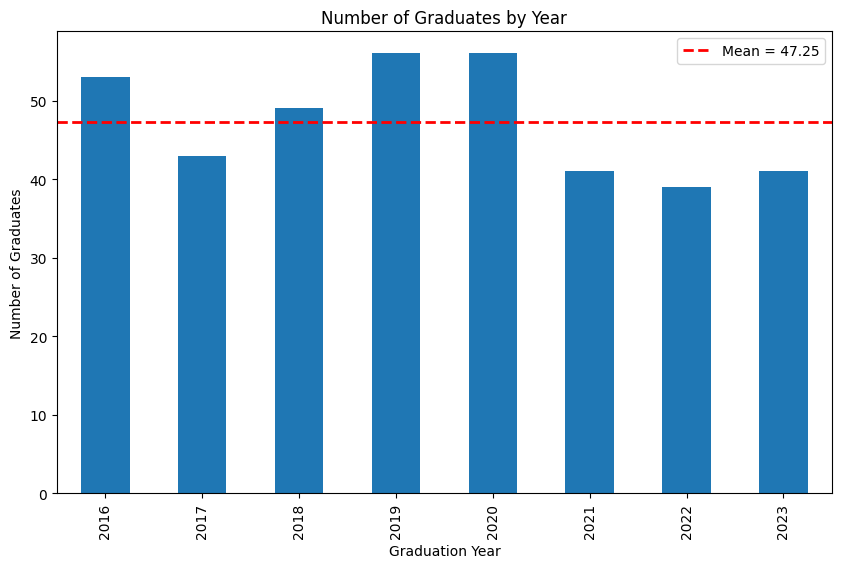

In [18]:
import matplotlib.pyplot as plt

# Group by 'gradyr' and get counts
counts = df.groupby('gradyr').size()

# Calculate the mean
mean_value = counts.mean()

# Plot the bar chart
ax = counts.plot(kind='bar', figsize=(10,6))
plt.xlabel('Graduation Year')
plt.ylabel('Number of Graduates')
plt.title('Number of Graduates by Year')

# Add a horizontal line for the mean
plt.axhline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_value:.2f}')

# Add legend
plt.legend()

plt.show()

In [27]:
%pip install altair

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import altair as alt

# Example: your actual DataFrame, replace this with your real df
# df = ... (your DataFrame loaded and processed)

# For demonstration, here's a sample DataFrame
# Remove this and use your actual DataFrame
df = pd.DataFrame({'gradyr': [2018, 2018, 2019, 2019, 2020, 2020, 2020]})

# Group by 'gradyr' and count
counts = df.groupby('gradyr').size().reset_index(name='count')

# Compute the mean
mean_value = counts['count'].mean()

# Create bar chart
bar_chart = alt.Chart(counts).mark_bar().encode(
    x=alt.X('gradyr:O', title='Graduation Year'),
    y=alt.Y('count:Q', title='Number of Graduates')
).properties(
    title='Number of Graduates by Year'
)

# Add mean line
mean_line = alt.Chart(pd.DataFrame({'y': [mean_value]})).mark_rule(color='red', strokeDash=[5, 5]).encode(
    y='y:Q'
)

# Combine chart and mean line
final_chart = bar_chart + mean_line

# Show in notebook
final_chart

alt.LayerChart(...)